## Uber Visualization Project

Understanding How Uber Data and Trends Can Empower Business Decisions in New York City. <br>
<br>
Geoffrey Gin <br>
Fairleigh Dickinson University<br>
Department of Mathematics and Computer Science <br>
Senior Project I & II<br>

Produced Under the Guidence of Dr. Neelu Sinha <br>

----------------------------------------------------------------------------------------------------------------------

Before we analyze our data, it is important to understand why it that Uber data matters. We imported this data set from kaggle which was able to obtain records from the New York City T&LC (Taxi and Limosine Commission) through a FOIA (Freedom of Information Act) request. <br>

[Genertification](https://www.oxfordlearnersdictionaries.com/us/definition/english/gentrification#:~:text=%2F%CB%8Cd%CA%92entr%C9%AAf%C9%AA%CB%88ke%C9%AA%CA%83n%2F-,%2F%CB%8Cd%CA%92entr%C9%AAf%C9%AA%CB%88ke%C9%AA%CA%83n%2F,higher%20social%20class%20than%20before) (definition) is synamous with young, weathy, typically racially white individuals. [Uber](https://news.gallup.com/poll/237965/snapshot-uses-ride-sharing-services.aspx), similarly has a ridership or user base that falls into the same key aspects of individuals associated with gentrification. This is the perfect recipe when analyzing in New York City given the amount of young people in New York City that also have highly disposable incomes given the [median salary](https://www.glassdoor.com/Salaries/new-york-city-professional-salary-SRCH_IL.0,13_IM615_KO14,26.htm) of a working profession in New York City. <br>

What this project seeks to accomplish is to not only prove the correlation between Uber ridership and gentrification. But more imporatly, how modeling these metrics can help businesses 'get ahead of the curve' and enter markets before there is a onslaught of competition. Additionally, New York City, as a global tourist destination, is home to many seasonal businesses that can benefit from information regarding the amount of people traveling to and within the city.

In [16]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import math

import matplotlib.pyplot as plt
import datashader as ds
import colorcet as cc
import folium


from collections import defaultdict, OrderedDict
from folium.plugins import HeatMapWithTime
from datetime import datetime

In [17]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

### Importing Files

We use the `pandas` library in order to import each csv files using the command `pd.read_csv`. We can also use the concat functionality of the `pandas` library in order to combine the multiple csv files into one data frame. We do this by calling `pd.concat`.

In [18]:
# Months in our csv files
months = ['apr','may', 'jun', 'jul', 'aug', 'sep']

# Creating a dataframe with our combined csv files
df = pd.concat(map(pd.read_csv, ['assets/uber-raw-data-apr14.csv', 'assets/uber-raw-data-may14.csv', 'assets/uber-raw-data-jun14.csv', 'assets/uber-raw-data-jul14.csv', 'assets/uber-raw-data-aug14.csv', 'assets/uber-raw-data-sep14.csv']))

# Calling the first 2 rows of our data frame to ensure our dataframe was created
df.head(2)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512


By default, the values of the time in our csv files are not in the correct format, we must change their data type to datetime in order to work with these number properly.

In [19]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Time'] = df['Date/Time'].dt.time


Calling the front and back of our data frame in order to ensure that we can account for our entire imported data.

In [20]:
df.head(2)

,Date/Time,Lat,Lon,Base,Month,Day,Time
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,00:11:00
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,00:17:00


In [21]:
df.tail(2)

,Date/Time,Lat,Lon,Base,Month,Day,Time
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,30,22:58:00
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,9,30,22:58:00


Creates a new column of day of the week, and hour of the day. This is important for further analysis down the road.

In [22]:
# Day of the week
df['Weekday'] = df['Date/Time'].dt.dayofweek

# Hour
df['Hour'] = df['Date/Time'].dt.hour


In [23]:
df.head(2)

,Date/Time,Lat,Lon,Base,Month,Day,Time,Weekday,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,00:11:00,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,00:17:00,1,0


In [24]:
df.tail(2)

,Date/Time,Lat,Lon,Base,Month,Day,Time,Weekday,Hour
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,30,22:58:00,1,22
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,9,30,22:58:00,1,22


The code below is used to convert the integer values of our columns into the days and months. This is for greater reabaility of the data and is an important step for cleansing our data.

In [25]:
# Map month
month_map = {
    4: 'April',
    5: 'May',
    6: 'June', 
    7: 'July',
    8: 'August',
    9: 'September'
}
df['Month'] = df['Month'].replace(month_map)

# Map weekday
weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday',
    6: 'Sunday'
}
df['Weekday'] = df['Weekday'].replace(weekday_map)

final_columns = [
    'Base', 'Lat', 'Lon', 'Month', 
    'Day', 'Weekday', 'Hour']
df = df[final_columns]

In [26]:
df.head(2)

,Base,Lat,Lon,Month,Day,Weekday,Hour
0,B02512,40.7690,-73.9549,April,1,Tuesday,0
1,B02512,40.7267,-74.0345,April,1,Tuesday,0


In [27]:
df.tail(2)

,Base,Lat,Lon,Month,Day,Weekday,Hour
1028134,B02764,40.7081,-74.0066,September,30,Tuesday,22
1028135,B02764,40.7140,-73.9496,September,30,Tuesday,22


In [28]:
num_missing = df.isnull().sum().sum()
print('Number of missing values: {}'.format(num_missing))

Number of missing values: 0


The next two cells are designed to validate the information in our data frame. This is an important step of data cleansing where we validate our information inside the data frame before we begin to model it.

In [29]:
# Latitude must be between -90 and 90
lat_check = df['Lat'].between(-90, 90, inclusive='both').all()
assert lat_check, 'Invalid latitude values exist'

# Longitude must be between -180 and 180
lon_check = df['Lon'].between(-180, 180, inclusive='both').all()
assert lon_check, 'Invalid longitude values exist'

# Hour must be between 0 and 23
hour_check = df['Hour'].between(0, 23, inclusive='both').all()
assert hour_check, 'Invalid hour values exist'

# Day must be between 1 and 31
day_check = df['Day'].between(1, 31, inclusive='both').all()
assert day_check, 'Invalid day values exist'

print('All value ranges valid.')


All value ranges valid.


In [30]:
# Months must be between 4 and 9
month_check = not set(df['Month']).difference(month_map.values())
assert month_check, 'Invalid Month values'

weekday_check = not set(df['Weekday']).difference(weekday_map.values())
assert weekday_check, 'Invalid Weekday values'

print('Value categories valid.')

Value categories valid.


In [31]:
duplicate_pickups = df[df.duplicated(keep=False)]
duplicate_pickups

,Base,Lat,Lon,Month,Day,Weekday,Hour
43,B02512,40.7430,-74.0301,April,1,Tuesday,5
44,B02512,40.7430,-74.0301,April,1,Tuesday,5
127,B02512,40.7805,-73.9481,April,1,Tuesday,7
128,B02512,40.7805,-73.9481,April,1,Tuesday,7
184,B02512,40.7620,-73.9787,April,1,Tuesday,8
...,...,...,...,...,...,...,...
1028065,B02764,40.7714,-73.9502,September,30,Tuesday,22
1028094,B02764,40.7277,-73.9893,September,30,Tuesday,22
1028095,B02764,40.7277,-73.9893,September,30,Tuesday,22
1028099,B02764,40.7212,-74.0048,September,30,Tuesday,22


In [32]:
num_pickups = df.shape[0]
num_days = len(df[['Month', 'Day']].drop_duplicates())
daily_avg = np.round(num_pickups/num_days, 0)

stats_raw = 'Number of Pickups: {}\nNumber of Days: {}\nAvg Daily Pickups: {}'
print(stats_raw.format(num_pickups, num_days, daily_avg))

Number of Pickups: 4534327
Number of Days: 183
Avg Daily Pickups: 24778.0


The code below takes data from [Gallup](https://news.gallup.com/poll/237965/snapshot-uses-ride-sharing-services.aspx), [The United States Census](https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork/PST120221), and [Pew](https://www.pewresearch.org/fact-tank/2019/01/04/more-americans-are-using-ride-hailing-apps/#:~:text=Today%2C%2036%25%20of%20U.S.%20adults,heard%20of%20ride%2Dhailing%20before.). <br>

These studies and surveys give us the percentage of the population that use ride sharing. These percentages were then parsed upon the total population of New York City to give us a rough estimate of the amount of total users per year that use Uber.

In [33]:
# Please note that the percentages will not add up to 100 percent given that minors under the age of 18 are excluded
total_new_yorkers = 8804190

# We use math.trunc to elimate the decimal value as we cannot have a partial amount of people. math.trunc() elimates the decimala and rounds the number to the nearest integer

total_of_users = math.trunc((total_new_yorkers * 0.4)) # total number of New Yorkers that use uber
total_18_29 = math.trunc((total_new_yorkers * 0.15) * (0.45)) # total number of New Yorkers that are 18 - 29
total_30_49 = math.trunc((total_new_yorkers * 0.36) * (0.36))# total number of New Yorkers that are 30 - 49
total_50_64 = math.trunc((total_new_yorkers * 0.12) * (0.23))# total number of New Yorkers that are 50 - 64
total_over_65 = math.trunc((total_new_yorkers * 0.15) * (0.13))# total number of New Yorkers that are 65 +
total_over_75k = math.trunc((total_new_yorkers * 0.458) * (0.71)) # total number of New Yorkers that make over 75k a year
    
stat_raw_totalnum = 'Total Uber Riders in New York: {}\nTotal Number of Riders Aged 18 to 29: {}\nTotal Number of Riders Aged 30 to 49: {}\nTotal Number of Riders Aged 50 to 64: {}\nTotal Number of Riders Aged 65+: {}\nTotal Number of Riders Making Over 75k a Year: {}\n'

print(stat_raw_totalnum.format(total_of_users, total_18_29, total_30_49, total_50_64, total_over_65, total_over_75k))

Total Uber Riders in New York: 3521676
Total Number of Riders Aged 18 to 29: 594282
Total Number of Riders Aged 30 to 49: 1141023
Total Number of Riders Aged 50 to 64: 242995
Total Number of Riders Aged 65+: 171681
Total Number of Riders Making Over 75k a Year: 2862946



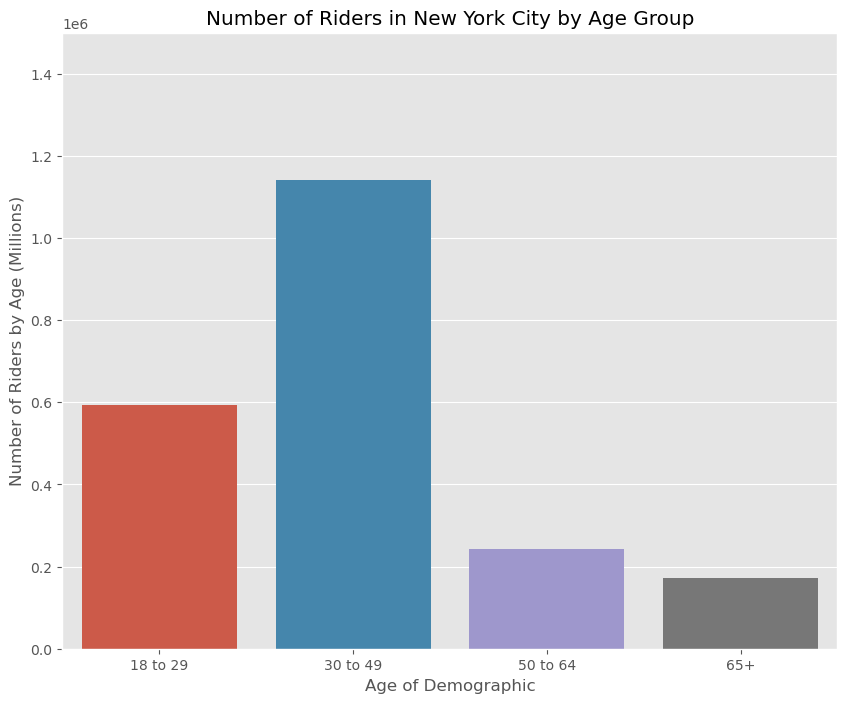

In [34]:
plt.figure(figsize = (10,8)) # setting the figure size
x_percentage_of_pop = ['18 to 29', '30 to 49', '50 to 64', '65+'] # creating a list for our x labels
y_percentage_of_pop = [total_18_29, total_30_49, total_50_64, total_over_65] # creating a list for our y labels
seaborn_perc_barplot = sns.barplot(x = x_percentage_of_pop, y=y_percentage_of_pop) # plotting fucntion using seaborn lib
seaborn_perc_barplot.set(ylim=(0, 1500000)) # setting range of y axis
plt.ylabel('Number of Riders by Age (Millions)') # label for y axis
plt.xlabel('Age of Demographic'); # label for x axis
plt.title('Number of Riders in New York City by Age Group') # graph title
plt.show()

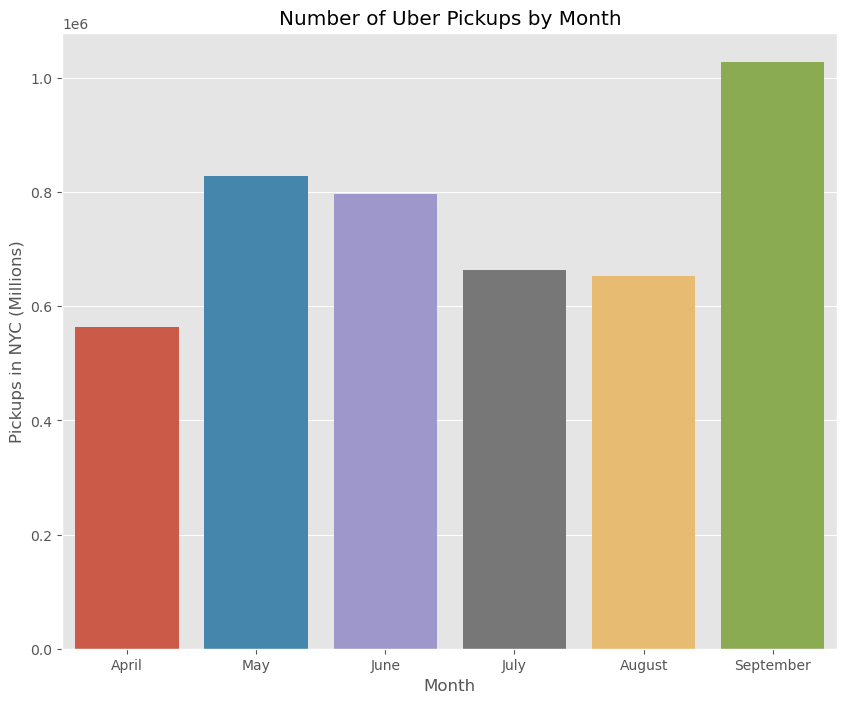

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x=df.groupby('Month')['Hour'].count().index,y=df.groupby('Month')['Hour'].count())
plt.xticks(ticks=[0,1,2,3,4,5],labels=['April','May','June','July','August','September'])
plt.ylabel('Pickups in NYC (Millions)')
plt.title('Number of Uber Pickups by Month')
plt.show()

New York has long been known to be busiest during its [summer months](https://www.headout.com/blog/best-time-to-visit-new-york/#:~:text=The%20busiest%20times%20of%20year,the%20city%20has%20to%20offer.) and this infomation correlated with our ridership numbers throughout the summer. Summer time it is typically expected that many tourists and relatives of New York City residents will travel to the city. <br>

For business, this means that they can expect to see a greater volume of individuals and should increase their stock on popular summer items. More important, there any many business that primarily operate in the summer time. For example, New York City in the summer time is froth with Ice Cream trucks and small vendors selling ice cold water. This is also important for business that expereince a good amount of typical foot traffic in the city, such as areas surrounding parks and attractions. Some example would be business and establishments near, Central Park, Washington Square Park, The Brooklyn Bridge, The MET, The Museum of Natural History, and of course, Time Square.

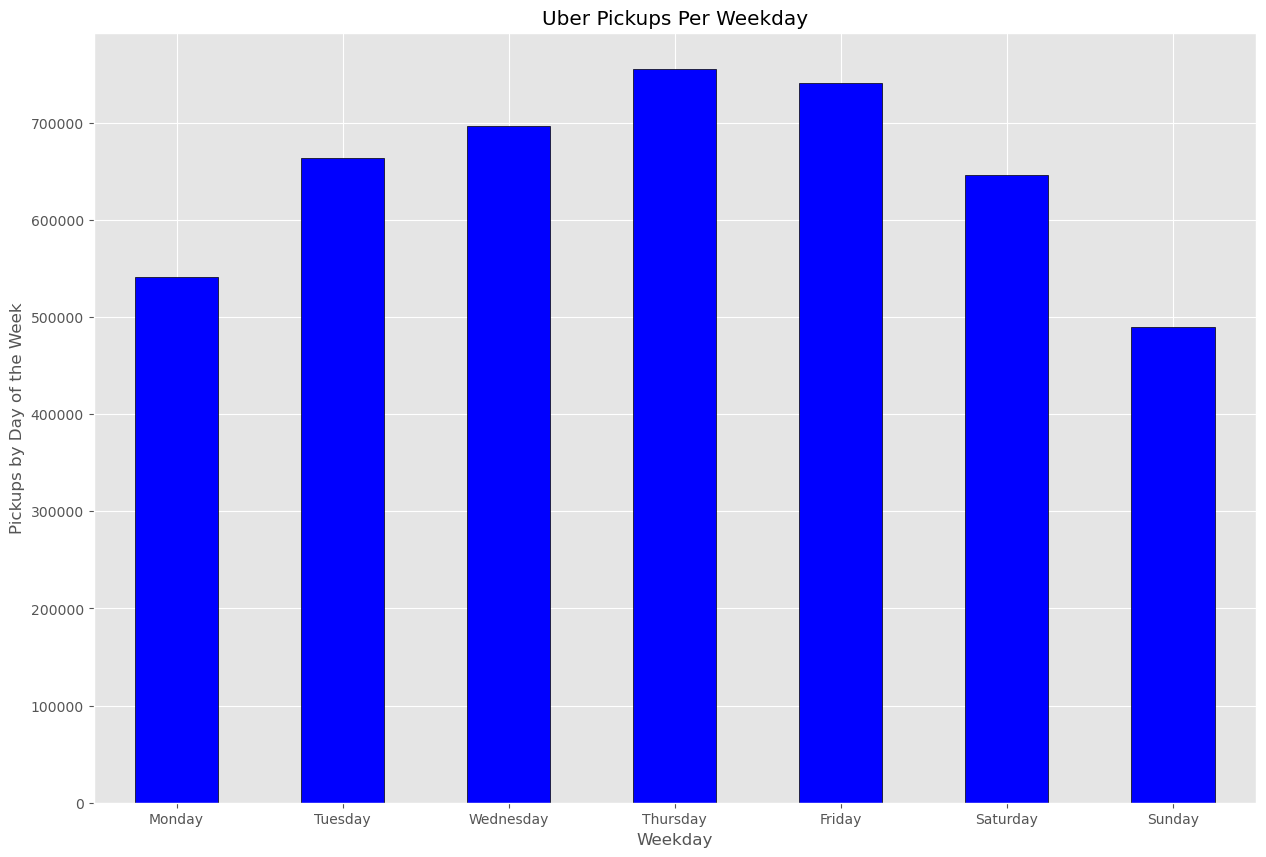

In [36]:
weekday_pickups = df['Weekday'].value_counts()[weekday_map.values()]

weekday_pickups.plot(kind='bar', rot=0, color = 'blue', edgecolor = 'black')
plt.title('Uber Pickups Per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Pickups by Day of the Week');

Uber ridership tends to spike as we approach the weekend. This data is consistent with [research](https://www.nerdwallet.com/article/travel/flying-for-christmas-best-days#:~:text=Most%20weeks%20of%20the%20year,23.) done that tracks what days are the busiest travel days. This most likely has to do with the prevelance of weekend travel, especially among young adults that typically use Uber regualarly.

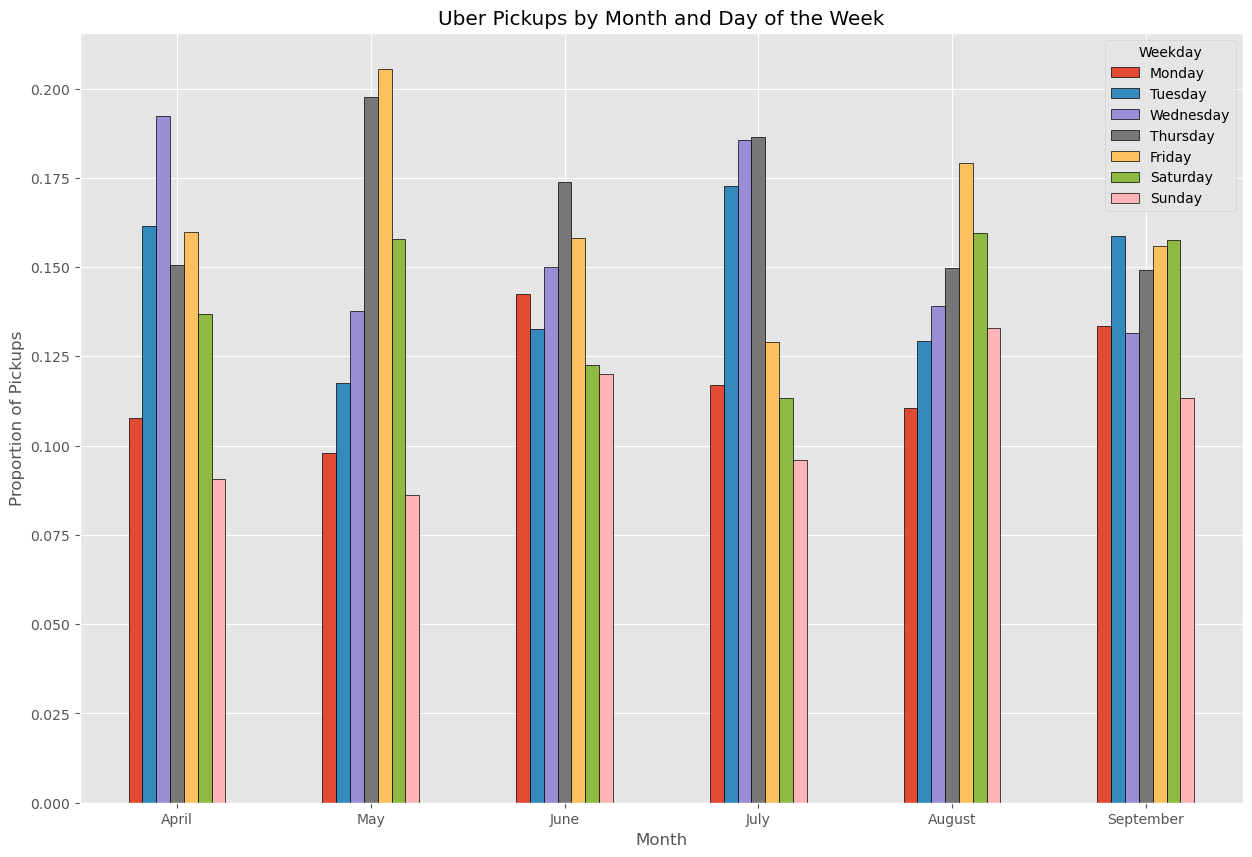

In [37]:
monthly_weekdays = df.groupby('Month')['Weekday'].value_counts().unstack()
monthly_weekdays_norm = monthly_weekdays.apply(lambda x: x/x.sum(), axis=1)

monthly_weekdays_norm.loc[month_map.values(),weekday_map.values()].plot(kind='bar', rot=0, edgecolor = 'black')
plt.ylabel('Proportion of Pickups')
plt.title('Uber Pickups by Month and Day of the Week');

Ridership of Uber is often typically affect by two major aspects in the offseason. Riders to and from work / school, and riders going out in the evenings for dinner or to bar / clubs. What we can see by this chart is a more consistent ridership each day throughout the summer months regardless of the day of the week. There is a much closer correlation. <br>

The implications of which is that time of day specialized business, such as coffee shops and bars, may see the potential for greater profits by operating for extended hours in the summer months.

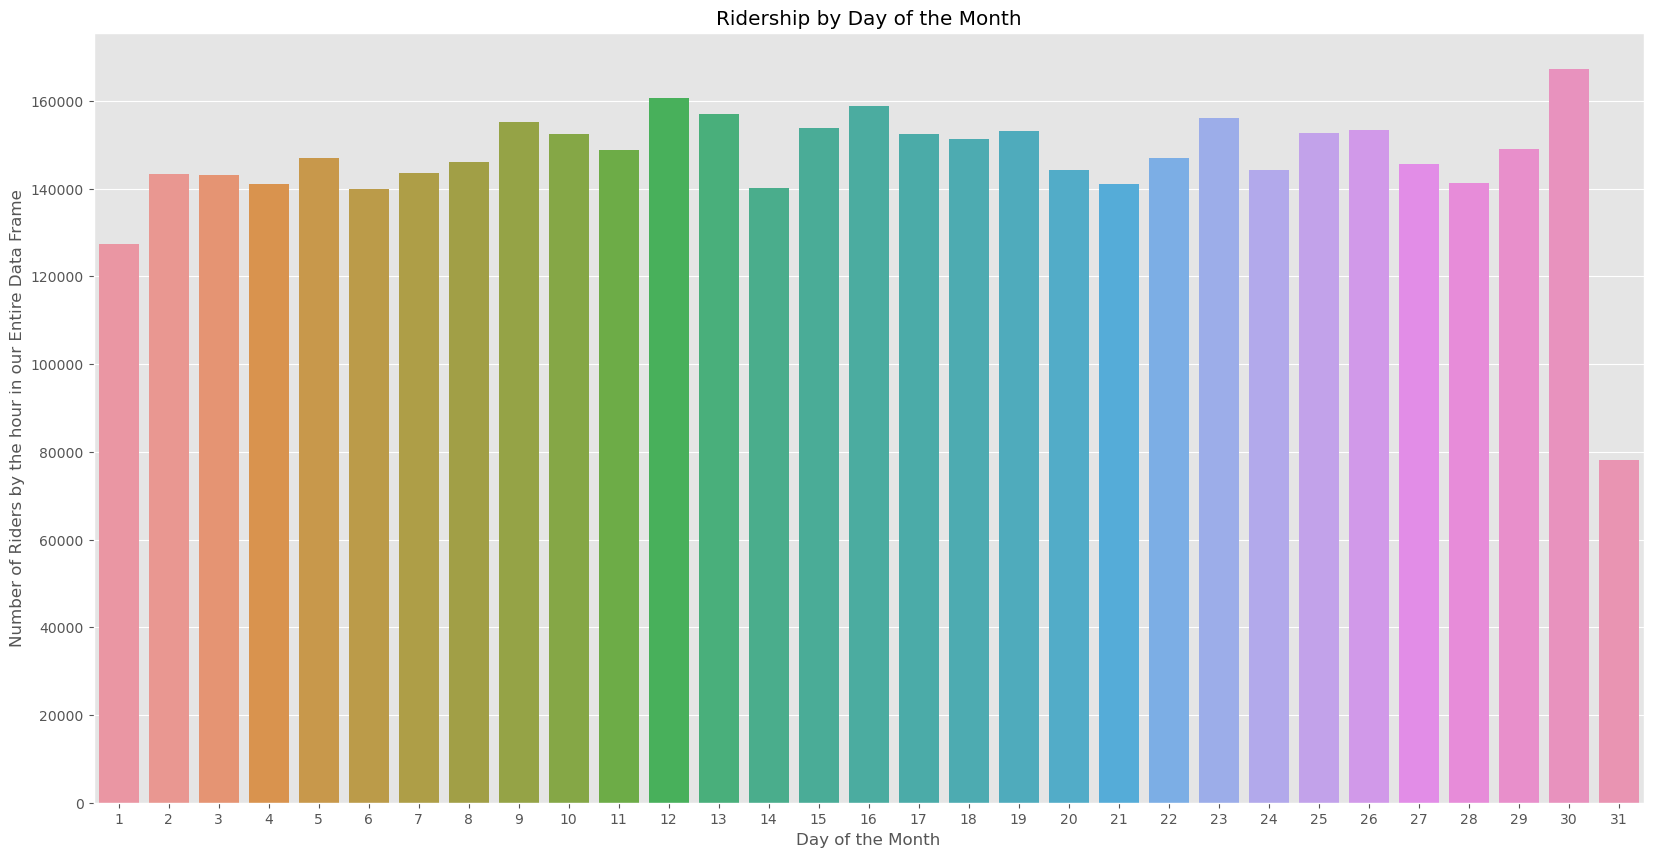

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x=df.groupby('Day')['Hour'].count().index,y=df.groupby('Day')['Hour'].count())
plt.ylabel('Number of Riders by the hour in our Entire Data Frame')
plt.xlabel('Day of the Month')
plt.title('Ridership by Day of the Month')
plt.show()

The bar graph above outputs the total ridership on each day of the month. It is important to note that we should exclude the 31st from this analysis given that not every month in our dataframe has a 31st day of the month.

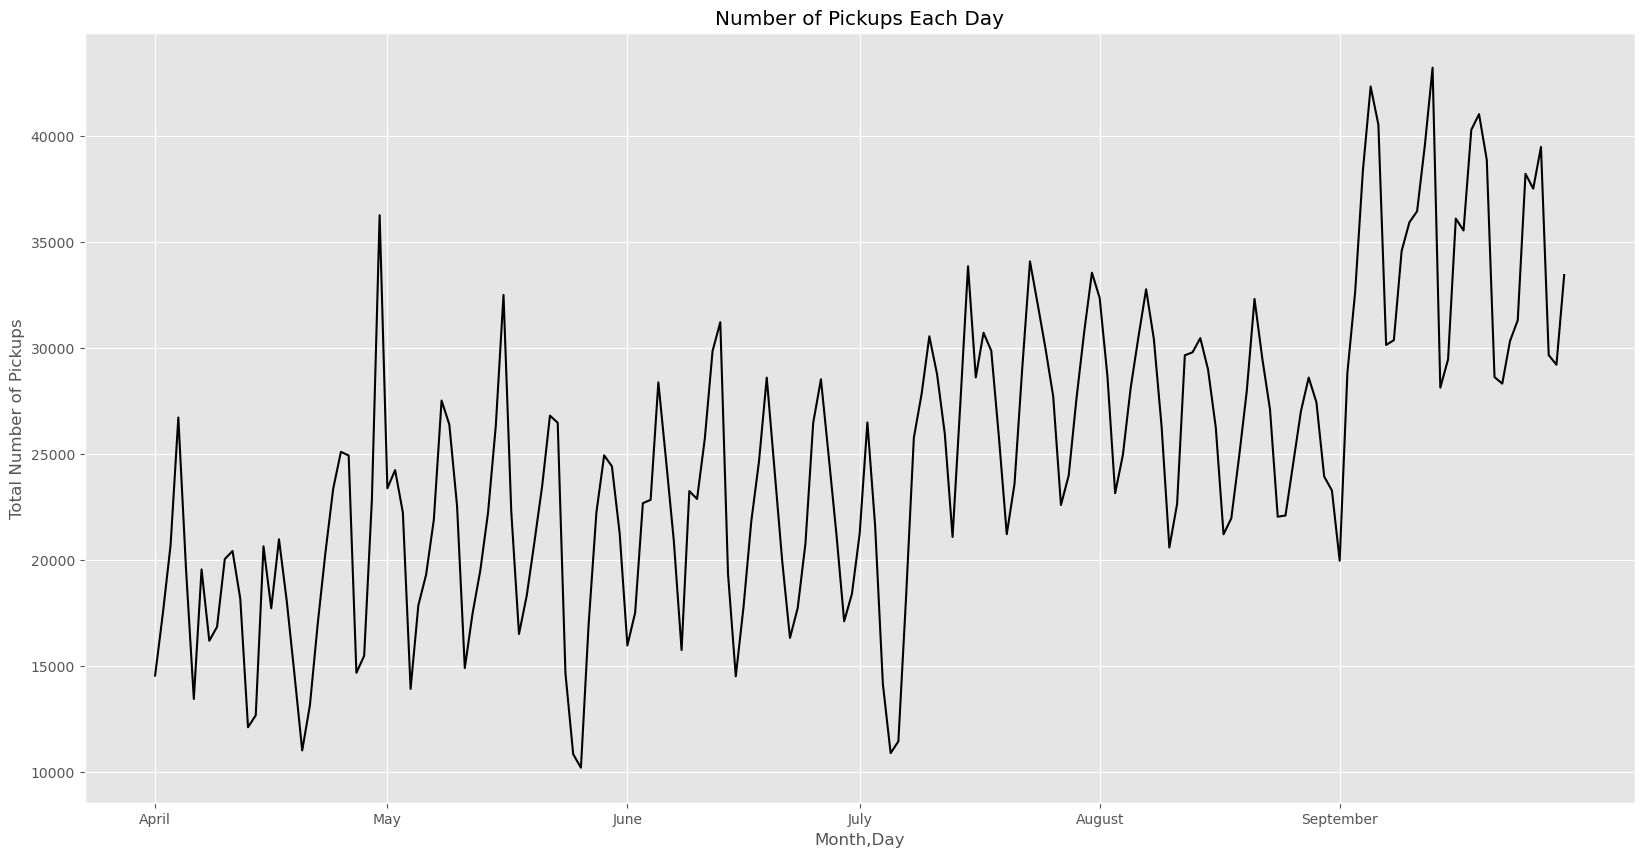

In [39]:
plt.figure(figsize = (20,10)) # setting figure size
daily_pickups = df.groupby(['Month', 'Day'])['Hour'].count()[month_map.values()]
daily_pickups.plot(kind='line', rot=0, color = 'black')
month_starts = np.where(daily_pickups.reset_index(level=0, drop=True).index.get_loc(1))[0]
plt.xticks(ticks=month_starts, labels=month_map.values())
plt.ylabel('Total Number of Pickups')
plt.title('Number of Pickups Each Day');

The purpose of a line graph in this median is to track trends. A line graph is also commonly used when looking at graphs for the stock market. The reason behind this is that it can show over market trends. For instance, by visualizing the highs and lows of the line graph, we can see clearly that as we approach the summer, the overall trend become greater. <br>

This graph greatly works in collaboriation with our previous bar graph. We can see from July onward, each day, there is a greater concentration of uber ridership. There are more total rides, yes, but there is also most cinsistent reidership throughout the day. This can often be attributed to greater tourism in the city, as well as more people going out at all times of the day across New York City.

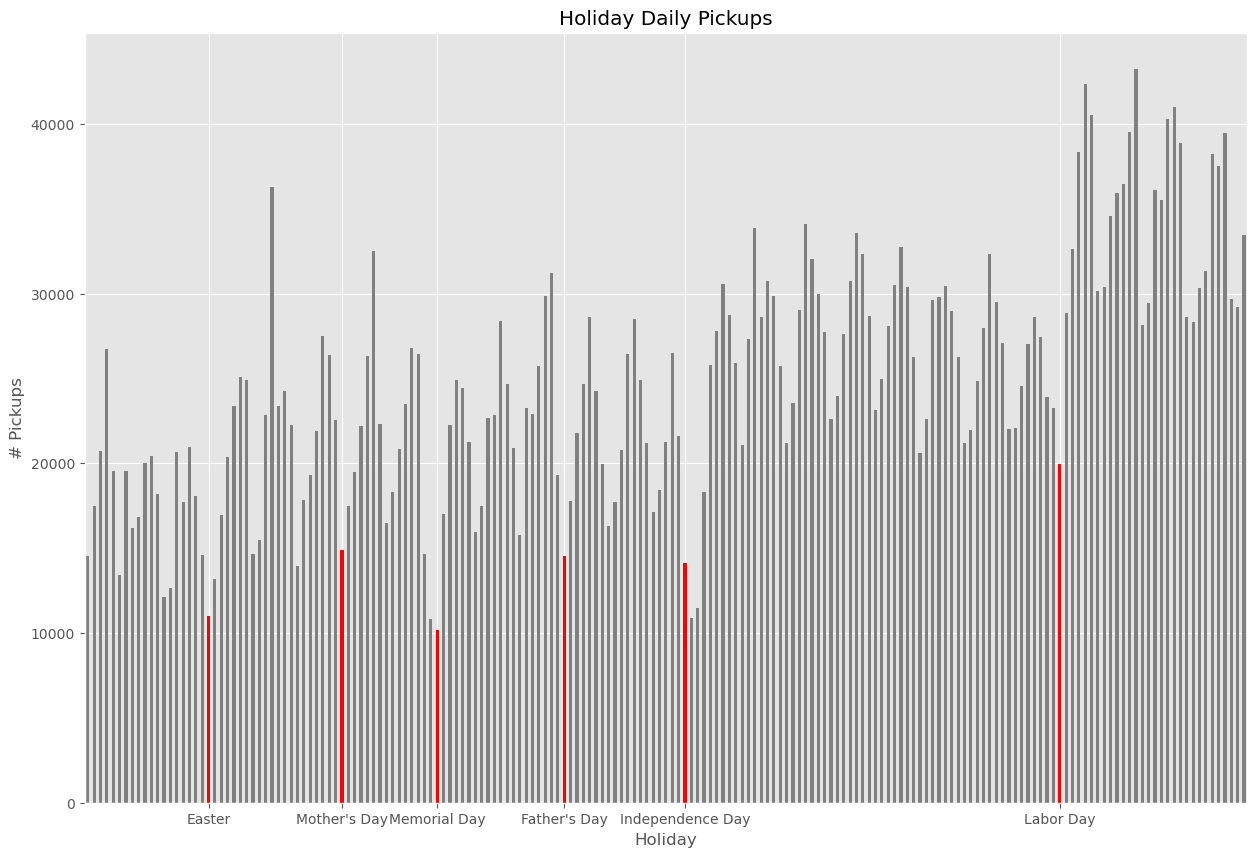

In [40]:
holidays = {
    "Easter": ('April', 20), # Sunday
    "Mother's Day": ('May', 11), # Sunday
    "Memorial Day": ('May', 26), # Monday
    "Father's Day": ('June', 15), # Sunday
    "Independence Day": ('July', 4), # Friday
    "Labor Day": ('September', 1) # Monday
}

holiday_starts = [daily_pickups.index.get_loc(hol) for hol in holidays.values()]
colors = ['grey' if x not in holiday_starts else 'red' for x in range(len(daily_pickups))] #setting the colors of our graph to highlight the specified holidays

daily_pickups.plot(kind='bar', color=colors, rot=0)
plt.xticks(ticks=holiday_starts, labels=holidays.keys())
plt.xlabel('Holiday') #label of x axis
plt.ylabel('# Pickups') #label of y axis
plt.title('Holiday Daily Pickups'); # graph title
plt.show()

Holidays are often statistical anomalies when it comes to such data as this. As we can see in the graph above, holidays there is substantially fewer riders on the holidays that are applicable in our data. <br>

This is imporatant to understand. Holidays typically tend to have individuals [spending more money](https://www.cnbc.com/2022/12/08/how-much-americans-may-spend-on-the-holidays.html) than they otherwise would do. This is imporatnt to understand for business. For instance, a bakery may want to be open on mothers day, however, it tends not to be a big spending day for business that rely heavily on foot traffic such as shops in malls. This is congruent with our data that shows less movement on hoidays. This is why you will often times seen retail stores closed on Christmas, but open on Thanksgiving day.


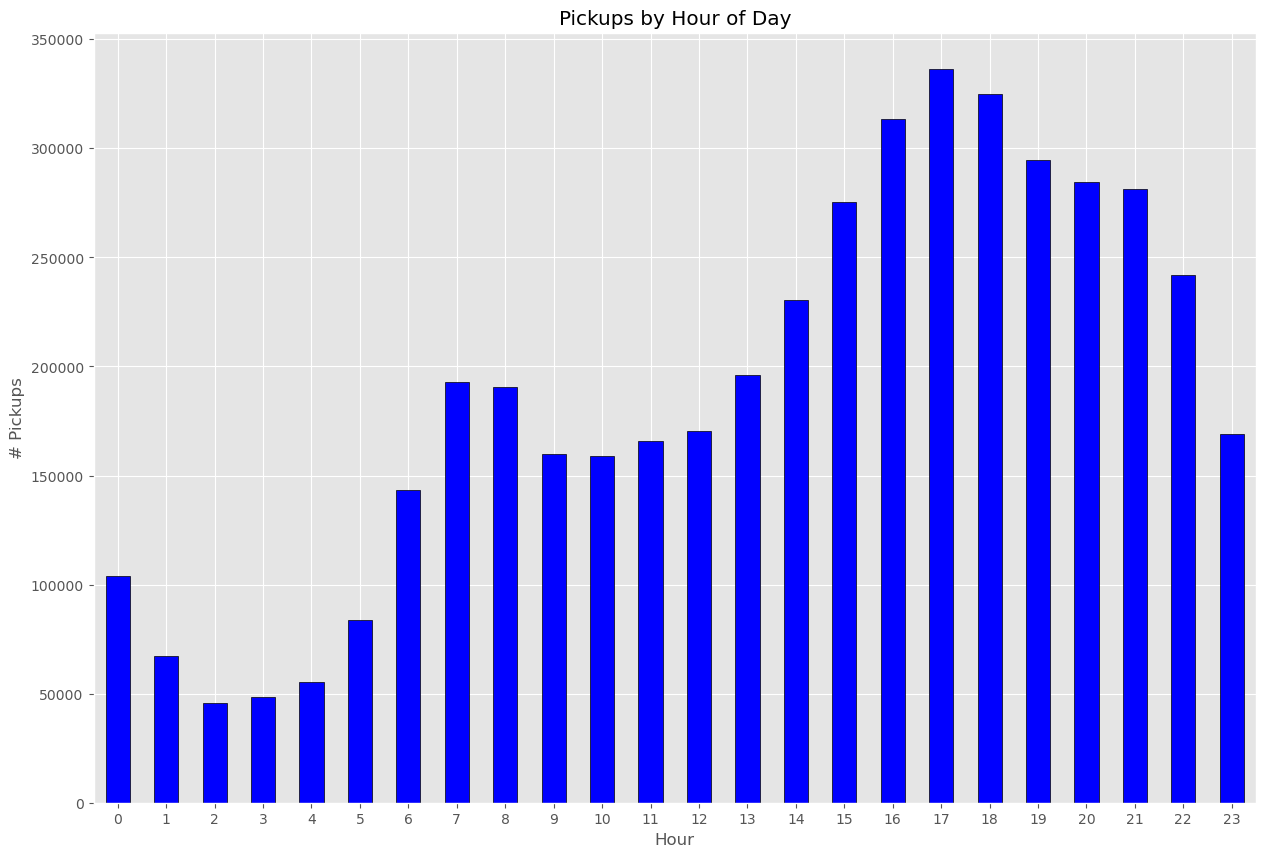

In [41]:
hourly_pickups = df['Hour'].value_counts().sort_index()

hourly_pickups.plot(kind='bar', rot=0, color = 'blue', edgecolor='black')
plt.xlabel('Hour')
plt.ylabel('# Pickups')
plt.title('Pickups by Hour of Day');

We discussed earlier how one of the peak times of ridership tends to be during rush hour. The above bar chart shows that on any given day in our data frame, peak ridership for the day occurs between 3 pm and 10 pm. With the absolute peak being 5 pm. This makes sense given that many people work 9-5 jobs. 


In [42]:
# We create a function plot_subplots that plots graphs for each corresponding month. It creates a 'subplot'
# meaning that there are actually individual plots for each month.

def plot_subplots(df, var_name, var_values, figsize, dim):
    """
    Helper function
    
    Plots subplots for a given variable (Month, Weekday) by Hour
    
    Definition for each parameter in the function
    
    df: DataFrame containing Uber pickups
    var_name: Name of the variable in 'df'
    var_values: List of variable values
    figsize: Tuple contianing figure size
    dim: List containing the dimension of subplots
    """
    
    # Figure layout
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=0.4, wspace=0.2)
    
    # Generate plot
    plot_num = 1
    for value in var_values:
        ax = fig.add_subplot(dim[0], dim[1], plot_num)
        value_df = df[df[var_name] == value]
        plot = (
            value_df['Hour']
            .value_counts(normalize=True)
            .sort_index()
            .plot(kind='bar', ax=ax, rot=0)
        )
        plt.title(value)
        plt.xlabel('Hour')
        plt.ylabel('Proportion of pickups')
        plot_num +=1

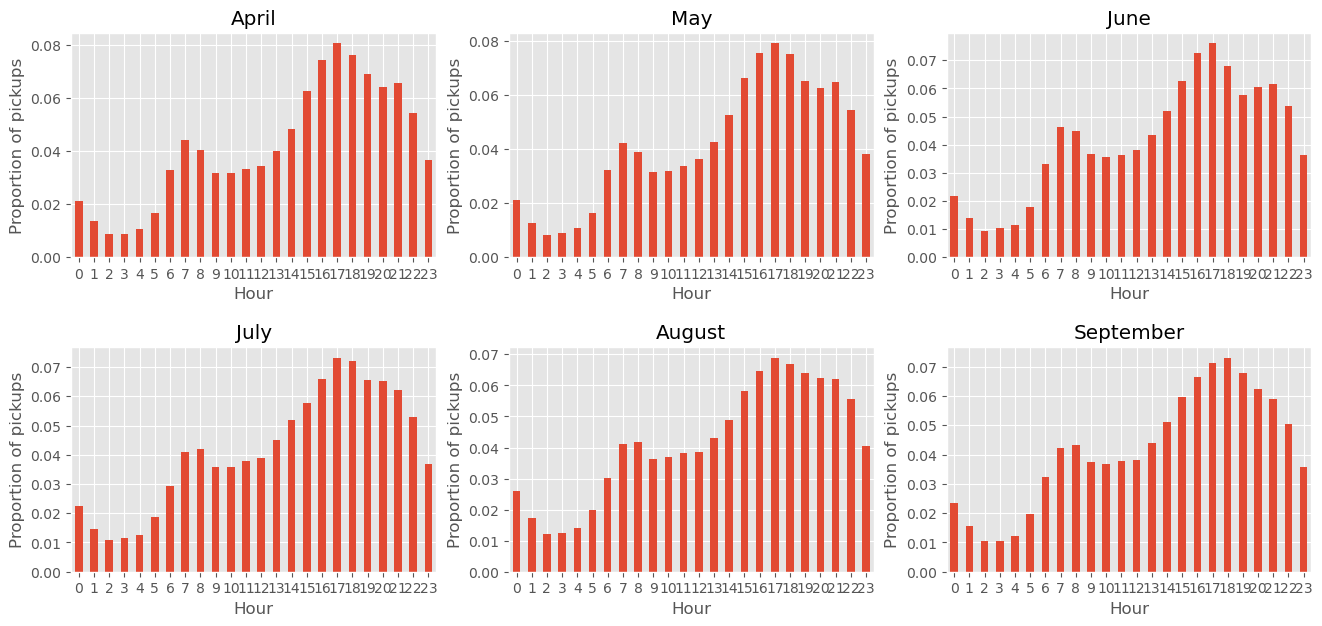

In [43]:
plot_subplots(df, 'Month', month_map.values(), (16, 7), [2, 3])

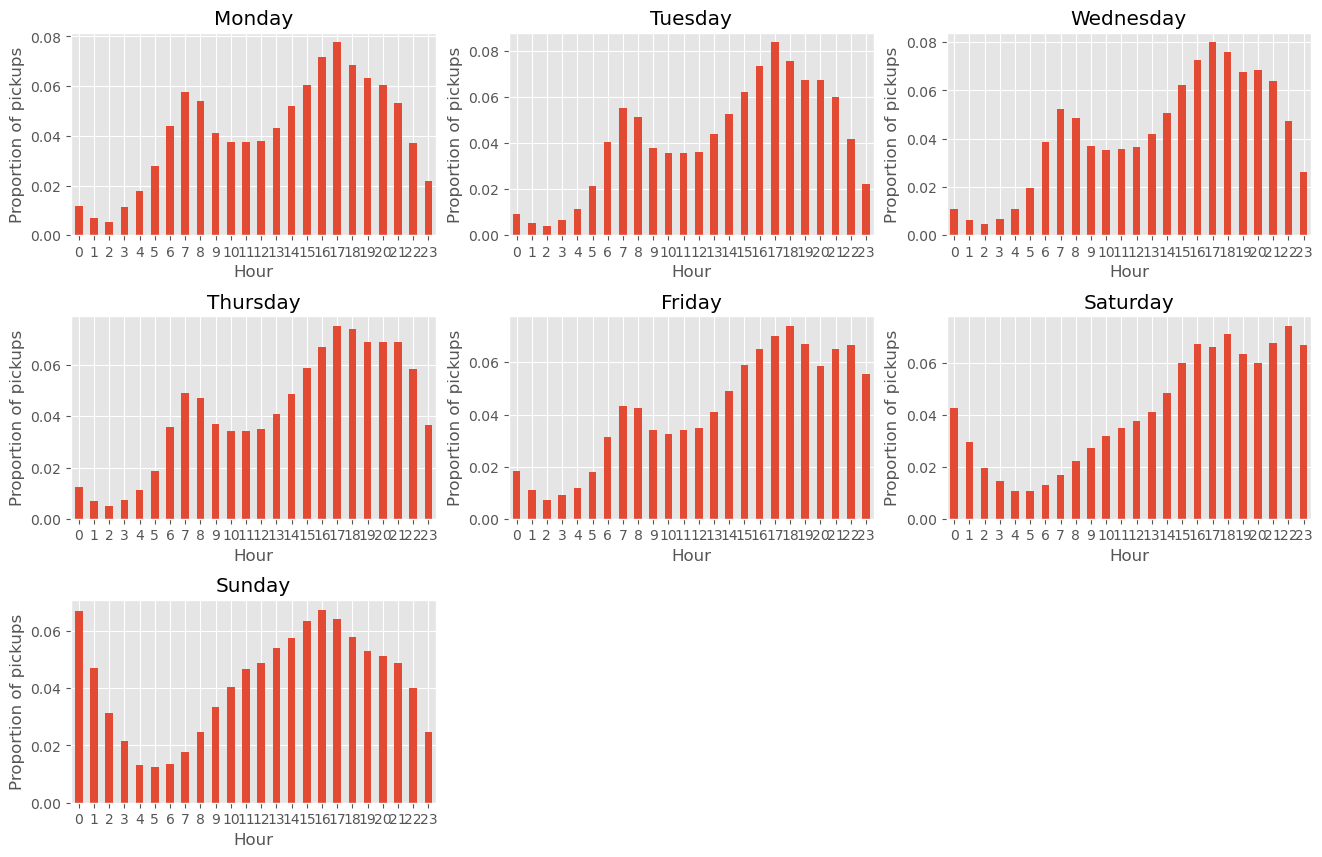

In [44]:
plot_subplots(df, 'Weekday', weekday_map.values(), (16, 10), [3, 3])

Number of Pickups in our Data Set: 4500872


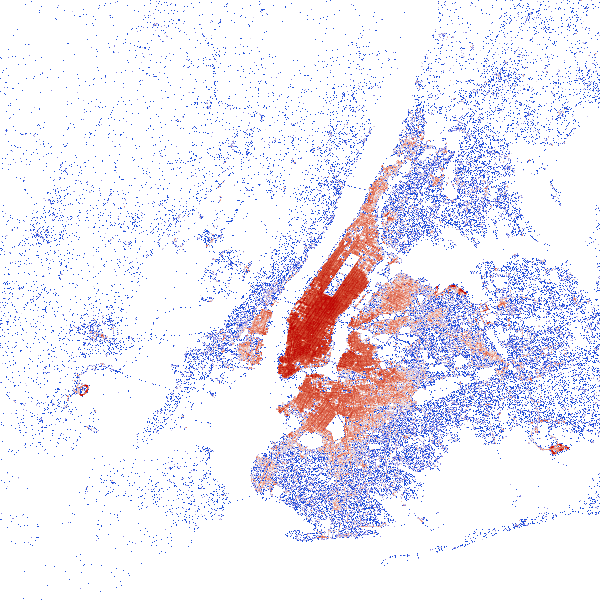

In [45]:
pickups_focused = df[
    df['Lon'].between(-74.25, -73.75) & 
    df['Lat'].between(40.5, 41)
]
print('Number of Pickups in our Data Set: {}'.format(len(pickups_focused)))

pickup_points = ds.Canvas().points(pickups_focused, 'Lon', 'Lat', )
ds.tf.set_background(ds.tf.shade(pickup_points, cmap=cc.coolwarm), "white")

#change .coolwarm to .rainbow, .fire, .bmw, .colorwheel, .isolum for different color schemes !
#We chose .coolwarm for its readability

### Heat Map Analysis and the Implications of Genetrification in New York City


Every ten years the United States conducts a census, the purpose of the census is to count every person living in the United States. This count is often broken up in countries, and census populations can greatly affect federal funding and more importantly, the number of congresisonal disctricts a state has, and by virtue, the number of total repersentatives in the United States House of Repersentatives. <br>

[New York City](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City) is comprised of 5 borough, each having their own county, and as such, the census is an accurate method for determining the residents of each borough. New York City contains the boroughs of Manhattan (New York County), The Bronx (Bronx County), Queens (Queen's County), Brooklyn (King's County), and Staten Island (Richmond County). <br>

The most recent census, in 2020 showed a sharp increase in the population of [Brooklyn, NY](https://bklyner.com/brooklyn-census-2020/). The study found that in the decade since the previous census, in 2010, there was a 231k increase in residents, this is a 9.3% jump. This is compared to the overall population increase of [New York City](https://www.manhattan-institute.org/kober-new-york-city-2020-census-data#:~:text=Confounding%20the%20U.S.%20Census%20Bureau's,enumerated%20population%20increased%20by%20686%2C000.) during the same time period of 661k. Meaning that Brooklyn inherited more than 34% of the total population gain of New York City while only repersenting less than 30% of the total population of New York City. <br>

It is no wonder why New Yorkers and outside observers typically speak of Brooklyn being one of the most popular destinations for new residents of New York City to move to. This brings into context as well, the overall understanding and sediment of the [gentrification](https://link.springer.com/article/10.1007/s12111-020-09499-y) of areas of northern Brooklyn, the areas closest to Manhattan. <br>

What is unique however about understanding information such as this, is that gentrification, while froth with its issue on racial matters, and the rising prices of homes in New York City, it is a unique business opportunity for certain types of profitable business. [For example](https://4legalleads.com/blog/how-gentrification-affects-small-businesses/), genertrification tends to bring in new residents that are much more likely to have disposible incomes. What this means is that for developers and home owners alike, they will see an increase in property values. Another sad aspect of genertrification is that small business tend to suffer. This however does pave the way for premium, and typically "white" businesses to flourish with a concentration of new residents that appeciate and enjoy their products. A great example of this would be Whole Foods, Starbucks, Chipotle. Other examples being expensive gyms like Equinox. <br>

The analytical portion of the heat map that is extremely important is to look for the outliars, the parts that are near populated, and genetrified areas near Brooklyn and Queens. We see a slow trail leading our of those neighborhoods and moving even further away from the city. As home prices continue to increase in those parts of the Brooklyn and Queens, other parts of those boroughs will also contiunue to see a rise in population, and these are key metrics for certain business oppurtunites. As we have mentioned, Uber ridership is synamous with young, typically white population groups and therefore, tailoring a business model towards a changing demographic is important to the profitablity of companies.

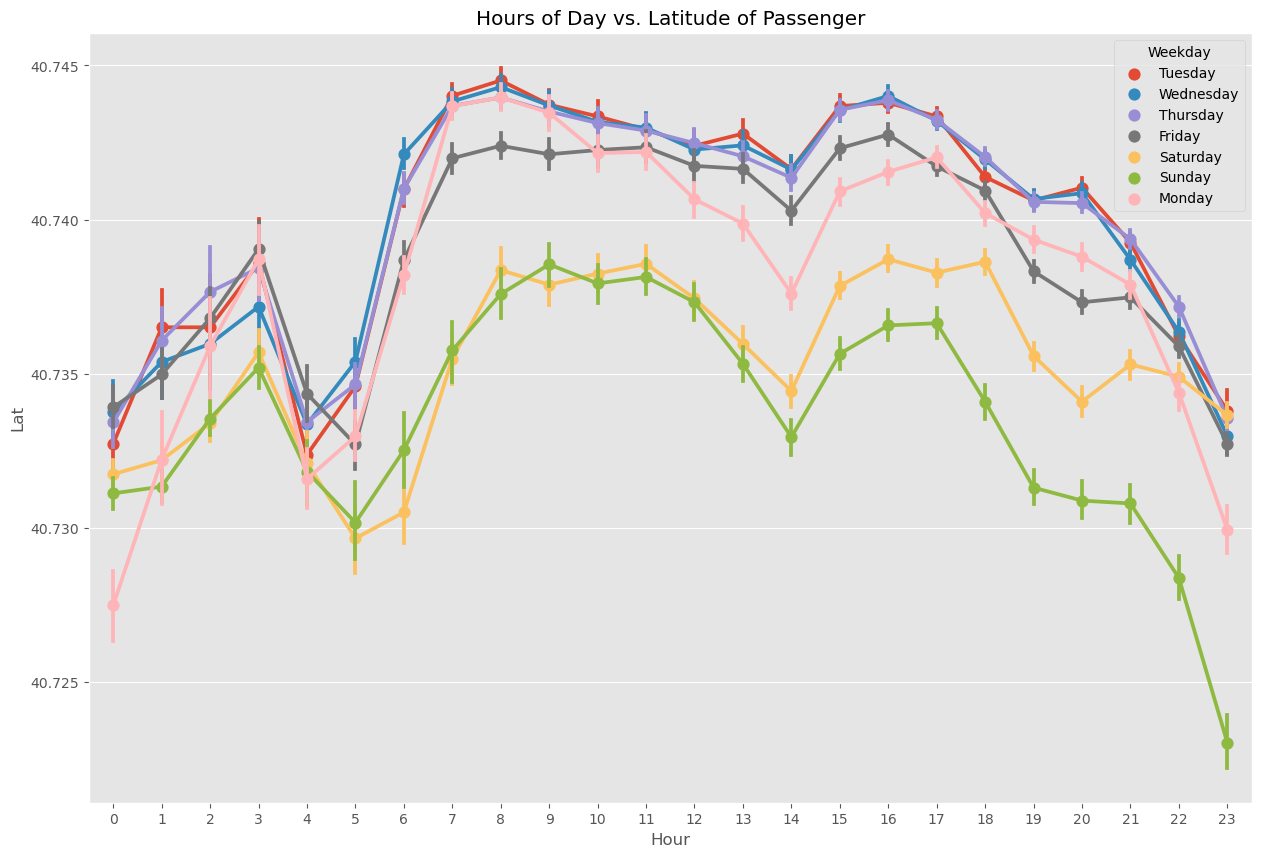

In [46]:
sns.pointplot(data=df,x='Hour',y='Lat',hue='Weekday')
plt.title('Hours of Day vs. Latitude of Passenger')
plt.show()

Above we chose to map latitude and the hour of the day. We reason we chose to map latitude simply has to do with the fact that the largest concentrations of Uber riders occurs on the island of manhattan. In additon, most neighborhoods are broken up on a north to south basis. <br>

From here we can identify that During certain key areas, we can distinguish much higher ridership in a certain cooridinate range. What this means is that this area is much more likely to have young people, most likely people that are gentrifying that respective neighborhood. Therefore, for certain business, there is a positive benefit if there were to have this information.

### EDA Conclusion

In todays age, our society is built upon data. Many news outlets, including [Forbes](https://www.forbes.com/sites/forbestechcouncil/2019/11/15/data-is-the-new-oil-and-thats-a-good-thing/?sh=58c377de7304) and [The Wire](https://www.wired.com/insights/2014/07/data-new-oil-digital-economy/) have called data the new oil. To understand why this is the case it is integral to understand why Data is so crucial and valuable to business. Much like Rockefeller's standard oil, data is a new frontier, full of prosperious opputunity. <br>

Nearly every company collects data on their users and there is a reason why such data is powerful. What was illistrated through this model was the simply connection you can make with a limited data set that can empower a business into future endeavors, of which, can be extremely lucrative. What goes beyond this is that it doesn't take an individual with a PHD to understand the data in front of them if it is accurately displayed, and properly cleansed. <br>

To continue on this point, this data was not collected by Uber technically, rather a government agency that had no intention of using this for profitable private business endeavors. What this shows is the power of data and how seemingly innocously collect data can be used.<br>

Several points were draw from this data. The points that were made served the purpose of intially understanding the data so that accurate and repersentative conclusions could be made later on. <br>

When analyzing data frames as an outsider, it is uncommon to also have locational data. The power of locational data, especially in a place such as New York City served as a catylst for this project. It is what initially drew me to this project. <br>

I have learned many new aspects of managing data and data frames that I did not know up until this point. In particular, I built upon certain aspects I have previously learned such as working with pandas, numpy, seaborn, and mathplotlib. However, there were new libraries I also had to learn how to use. In addition, the necessary documentation in order to map the cooridinates in the data frame. <br>

Overall, this project challenged my ability, and made me look at the importance of understanding data in a different light. It has made me curious about what could be done with larger and more refined data sets and how much more there is for me to learn. I feel that this project took me not only out of my comfort zone but forced me to learn on my own independently. As my first 'Independent Studies' course it has made me realize aspects of my own learning style that I will continue to build upon and hopefully use in my Career after FDU. <br>

### PyTorch Machine Learning Analysis

In [ ]:
# Import Pytorch Libraries 

import torch
import torch.nn as nn
import torch.optim as optim

In [49]:
# Linear Regression with PyTorch 

# Assuming df is your DataFrame with the Uber data
# For simplicity, let's use only the 'Hour' and 'Pickup_Count' columns
df['Pickup_Count'] = df.groupby(['Hour'])['Base'].transform('count')
data = df[['Hour', 'Pickup_Count']].drop_duplicates()

# Split data into features (X) and target (y)
X = torch.tensor(data['Hour'].values, dtype=torch.float32).view(-1, 1)
y = torch.tensor(data['Pickup_Count'].values, dtype=torch.float32).view(-1, 1)

# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, define loss function and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Print the model's parameters
print(f'Estimated coefficient: {model.linear.weight.item()}')
print(f'Estimated intercept: {model.linear.bias.item()}')

Epoch [100/1000], Loss: 3534192640.0000
Epoch [200/1000], Loss: 3433318144.0000
Epoch [300/1000], Loss: 3342586624.0000
Epoch [400/1000], Loss: 3260978176.0000
Epoch [500/1000], Loss: 3187576832.0000
Epoch [600/1000], Loss: 3121555712.0000
Epoch [700/1000], Loss: 3062172928.0000
Epoch [800/1000], Loss: 3008762880.0000
Epoch [900/1000], Loss: 2960722944.0000
Epoch [1000/1000], Loss: 2917513472.0000
Estimated coefficient: 13153.5478515625
Estimated intercept: 27572.4921875


#### Analyzing the Linear Regression Results

`Loss:` The loss value represents the mean squared error (MSE) between the predicted number of Uber pickups and the actual number of pickups for each hour. It's a measure of how well the model is performing. You can see that the loss is decreasing over time, which means that the model is learning and improving its predictions.

`Epochs:` An epoch is one complete pass through the entire training dataset. In your output, the loss is reported every 100 epochs. You trained the model for a total of 1000 epochs.

`Estimated Coefficient:` This is the weight assigned to the 'Hour' feature in your linear regression model. It represents the change in the number of pickups for each additional hour of the day. In this case, the estimated coefficient is approximately 13153.55, which means that, on average, the number of pickups increases by about 13153.55 for each additional hour.

`Estimated Intercept:` This is the y-intercept of the linear regression line, which represents the predicted number of pickups when the hour is zero (i.e., midnight). The estimated intercept is approximately 27572.49, which means that the model predicts around 27572.49 pickups at midnight.

Overall, the model is suggesting that there is a positive linear relationship between the hour of the day and the number of Uber pickups, with more pickups occurring later in the day. However, it's important to note that this is a very simplistic model, and there are many other factors that could influence the number of Uber pickups, such as weather, day of the week, and special events. 

In [50]:
# Using neural netowrks to predict how many riders there will be in a particular hour

# Prepare the data
X = torch.tensor(data['Hour'].values, dtype=torch.float32).view(-1, 1)
y = torch.tensor(data['Pickup_Count'].values, dtype=torch.float32).view(-1, 1)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # Input layer to hidden layer
        self.fc2 = nn.Linear(10, 1)  # Hidden layer to output layer
        self.relu = nn.ReLU()        # Activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model, define loss function and optimizer
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
# Here you can input any hour value to predict the number of pickups
test_hour = torch.tensor([[15]], dtype=torch.float32)  # For example, 3 PM
predicted_pickups = model(test_hour).item()
print(f'Predicted number of pickups at {test_hour.item()} PM: {predicted_pickups:.2f}')


Epoch [100/1000], Loss: 43668156416.0000
Epoch [200/1000], Loss: 43345686528.0000
Epoch [300/1000], Loss: 42755887104.0000
Epoch [400/1000], Loss: 41931264000.0000
Epoch [500/1000], Loss: 40895348736.0000
Epoch [600/1000], Loss: 39671156736.0000
Epoch [700/1000], Loss: 38282018816.0000
Epoch [800/1000], Loss: 36751515648.0000
Epoch [900/1000], Loss: 35103277056.0000
Epoch [1000/1000], Loss: 33360715776.0000
Predicted number of pickups at 15.0 PM: 31035.16
